In [1]:
%plot inline -w 600 -h 600
function plot_points(x,y)
    plot(x,y,'ob','markersize', 10,'markerfacecolor','b')
    xlabel('Dani u nedelji');
    ylabel('Broj zarazenih');
    set(gca,'fontsize', 16);
    axis([0,max(x)+2,min(y)-100 max(y)+100]);
    set(gca, 'XTick',0:max(x)+2);
endfunction

# Interpolacija

#### Recimo da imamo podatke o 5 dana u nedelji o broju zaraženih virusom COVID-19 u Srbiji. Podaci su dati u obliku dva vektora. Vektor $x$ sadrži dane u nedelje označene rednim brojevima, dok vektor $y$ sadrži podtaka ob broju zaraženih.

In [2]:
x=1:5
y=[579,1053,1328,1384,1545]

x =

   1   2   3   4   5

y =

    579   1053   1328   1384   1545



#### Narctaćemo podatke kao tačke na 2d grafiku.

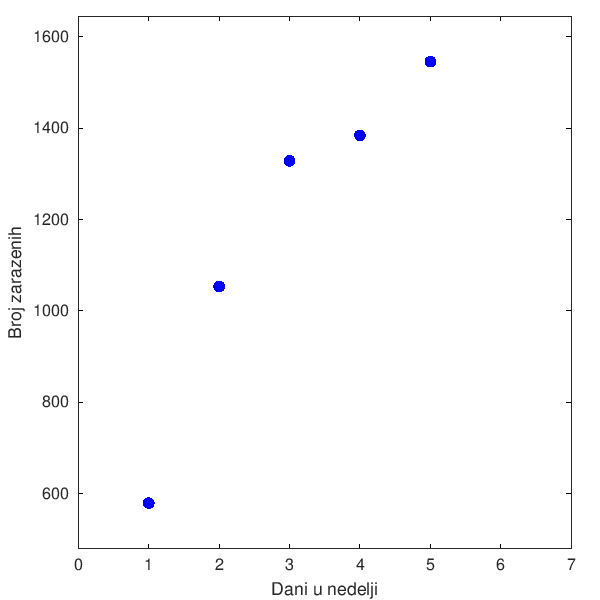

In [3]:
plot_points(x,y)

#### Recimo sada da iz nekog razloga izgubimo podatak o broju zaraženih u danu 3. Da li možemo da ga nadoknadimo, ondnosno procenimo pomoću numeričkih algoritama?

#### Koristimo interpolaciju. Interpolacija je tehnika koja nam omogućava da pronađemo "skrivenu" funkciju koja najbolje opsiuje (najbolje se uklapa) naše podatke.
#### Konkretnije, interpolacija funkcioniše tako što pronalazi polinom koji **mora** da prođe kroz sve tačke (podatke) koje imamo.
#### Taj polinom se posle može koristiti da procenimo vrednosti koje nam nedostaju u opsegu promenljive $x$ (interpolacija) ili da predvidimo vrednosti van opsega promenljive $x$ (ekstrapolacija). Oba slučaja ćemo prikazati na predavanju.

#### Prikazaćemo prvo kako izgleda interpolacioni polinom za naše podatke **bez dana 3**, a nakon toga načine pomoću koji možemo da ga dobijemo.

In [4]:
unknown = 3;
x1=[1:length(x)];
x1(unknown)=[]
y1=y;
y1(unknown)=[]

x1 =

   1   2   4   5

y1 =

    579   1053   1384   1545



25.333*x^3 - 280.17*x^2 + 1137.2*x^1 - 303.33


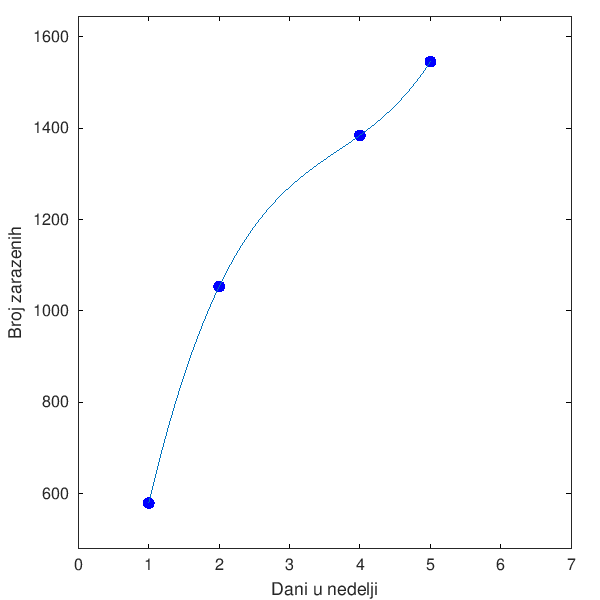

In [5]:
plot_points(x1,y1)
hold on;
p=polyfit(x1, y1, 3);
xp=linspace(1,max(x1),100);
plot(xp,polyval(p,xp))
polyout(p,'x')

### Interpolacija - prvi način

#### Interpolacioni polinom trećeg stepena formiramo rešavanjem sistema linearnih jedančina.
#### Šta mislite zašto formiramo polinom baš trećeg stepena? (Mala pomoć: imamo 4 tačke. Ako imamo dve tačke kog stepena je polinom koji prolazi kroz njih?)
#### Opšti oblik polinoma trećeg stepena:

### $$p(x)=a_1x^3+a_2x^2+a_3x+a_4$$

#### Možda ste primetili da smo koeficijente poređali tako da je onaj sa namanjim indeksom ($a_1$) uz najveći stepen ($x^3$) i tako redom. To je zato što MATLAB i Octave reprezentuju polinome kao vektore koeficijenata, tako da prvom indeksu u vektoru odogvara koeficijent uz najveći stepen, a drugom koeficjent uz stepen manje itd.

In [6]:
polyout([1 2 3 4],'x')

1*x^3 + 2*x^2 + 3*x^1 + 4


#### Sistem linearih jednačina pomoću koga dobijemo polinom formiramo tako što koristimo uslove koje polinom mora da zadovolji.
#### Konkretno, polinom mora da prođe kroz sve tačke koje imamo. To znači da za svako $x$ iz podataka $p(x)$ mora da bude jednko odgovarajućem $y$.
#### Za naš primer uslovi su sledećeg oblika:
#### $$x=(1,2,4,5)\\y=(579,1053,1384,1545)\\p(1)=579, p(2)=1053, p(4)=1384, p(5)=1545$$

#### $$a_1\cdot1^3+a_2\cdot1^2+a_3\cdot1+a_4=579\\a_1\cdot2^3+a_2\cdot2^2+a_3\cdot2+a_4=1053\\a_1\cdot4^3+a_2\cdot4^2+a_3\cdot4+a_4=1384\\a_1\cdot5^3+a_2\cdot5^2+a_3\cdot5+a_4=1545$$

#### Dobili smo sistem od 4 jednačine sa 4 nepoznate, gde su nam koeficijenti polinoma nepoznate. Rešavanjem sistema dobijamo polinom.
#### Matrica sistema ima sledeći oblik:

#### $$A=\begin{bmatrix}
1^3 & 1^2 & 1 & 1\\
2^3 & 2^2 & 2 & 1\\
4^3 & 4^2 & 4 & 1\\
5^3 & 5^2 & 5 & 1\\
\end{bmatrix}$$

#### Ovakve matrice imaju i opšti oblik i nazivaju se Vandermondove matrice:

### $$A=\begin{bmatrix}
x_1^{n-1} & x_1^{n-2} & \dots & x_1 & 1\\
x_2^{n-1} & x_2^{n-2} & \dots & x_2 & 1\\
\dots & \dots  & \dots & \dots & \dots\\
x_n^{n-1} & x_n^{n-2} & \dots & x_n & 1\\
\end{bmatrix}$$

#### Vandermodove matrice generalno imaju veliki kondicioni broj, kao što ćete videti u nastavku, pa se način na koji sada određujemo interpolacioni polinom ne preporučuje. Zato učimo i druge metode za interpolaciju.

#### Pišemo sada kod za formiranje matrice A za naš primer.
#### Formiramo prvo matricu koja sadrži samo jedinice.

In [7]:
A=ones(length(x1),length(x1))

A =

   1   1   1   1
   1   1   1   1
   1   1   1   1
   1   1   1   1



#### Nakon toga dodajemo redom kolone tako što podižemo ceo vektor $x1$ na odgovarajući stepen, redom od 3 pa do 1.

In [8]:
for i=length(x1)-1:-1:1
    A(:,i)=A(:,i+1).*x1';
end
A

A =

     1     1     1     1
     8     4     2     1
    64    16     4     1
   125    25     5     1



In [9]:
cond(A)

ans =  1228.8


#### Vidimo da je kondicioni broj veliki.

#### Formiramo vektor $b$ pomoću vektora $y1$ i nakon toga rešavamo sistem.

In [10]:
b=y1'

b =

    579
   1053
   1384
   1545



In [11]:
p=A\b

p =

     25.333
   -280.167
   1137.167
   -303.333



#### Transponujemo koeficijente polinoma $p$ i prikazujemo polinom.

In [12]:
p=p'

p =

     25.333   -280.167   1137.167   -303.333



In [13]:
p_pomocu_SLAJ=p %cuvamo ovaj polinom da bi ga kasnije uporedili sa polinomima dobijenim drugim metodama.

p_pomocu_SLAJ =

     25.333   -280.167   1137.167   -303.333



In [14]:
polyout(p,'x')

25.333*x^3 - 280.17*x^2 + 1137.2*x^1 - 303.33


#### Izračunavamo sada procenu broja zaraženih za vrednost $x=3$, odnosno treći dan.
#### Koristimo ugrađenu funkciju $polyval$ koja izračunava vrednost polinoma u tački.

In [15]:
predikcija = polyval(p,unknown)

predikcija =  1270.7


In [16]:
tacna_vrednost = y(unknown)

tacna_vrednost =  1328


#### Vidimo da je naša procena (1270) relativno blizu tačnoj vrednosti od 1328 zaraženih.

#### Prikazujemo sada interpolacioni polinom, kao i predikciju i tačnu vrednost za $x=3$.

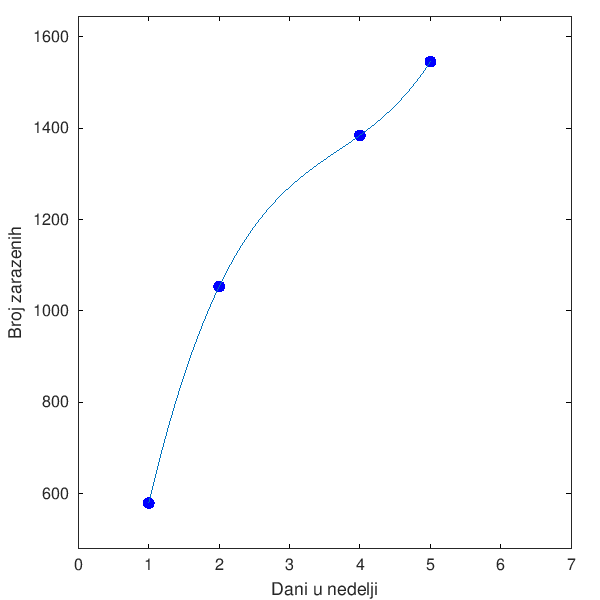

In [17]:
plot_points(x1,y1)
hold on;
xp=linspace(1,max(x1),100);
plot(xp,polyval(p,xp))

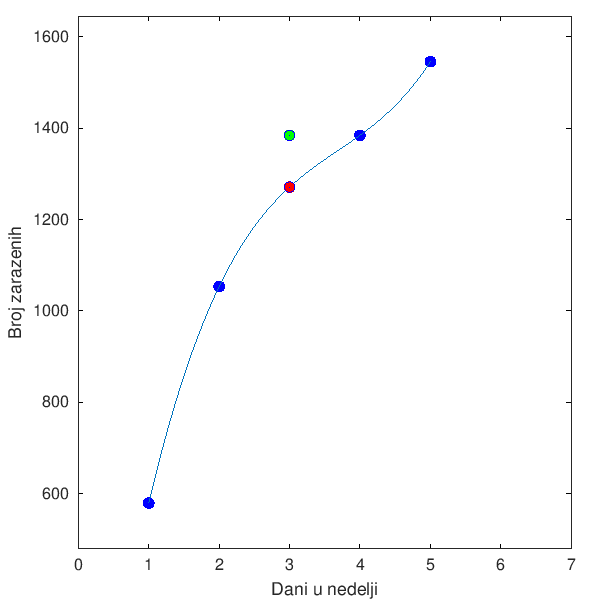

In [18]:
plot_points(x1,y1)
hold on;
xp=linspace(1,max(x1),100);
plot(xp,polyval(p,xp))
hold on;
plot(unknown,polyval(p,unknown),'ob','markersize', 10,'markerfacecolor','r')
hold on;
plot(unknown,y1(unknown),'ob','markersize', 10,'markerfacecolor','g')

## Lagranžov interpolacioni polinom

#### Lagranžov interpolacioni polinom ima oblik:
### $$p(x)=y_1(x)\cdot L_1(x)+y_2(x)\cdot L_2(x)+\dots+y_n(x)\cdot L_n(x)$$
#### , gde su $L_1(x),L_2(x),\dots,L_n(x)$ polinomi čiji ćemo oblik objasniti.

#### Sada ćemo na primeru tri tačke i interpolacionog polinoma drugog stepena pokazati kako je Lagranž kreirao polinome $L_i$.
#### Za date tri tačke $(x_1,y_1)$,$(x_2,y_2)$ i $(x_3,y_3)$ Lagranžov interpolacioni polinom je oblika:
### $$p(x)=y_1\frac{(x-x_2)(x-x_3)}{(x_1-x_2)(x_1-x_3)}+y_2\frac{(x-x_1)(x-x_3)}{(x_2-x_1)(x_2-x_3)}+y_3\frac{(x-x_1)(x-x_2)}{(x_3-x_1)(x_3-x_2)}$$

#### U suštini mi imamo "naređane" sve vrednosti za $y$ u zbiru gore, i sad treba da obezbedimo da $p(x)$ zadovoljavao uslove interpolacionog polinoma. 
#### Konkretnije, treba da polinome $L_i$ formiramo tako da važi $p(x_i)=y_i$ za $i={1,\dots,n}$.
#### Dakle, hоćemo da kada na primer ubacimo $x_1$ u polinom $p$ da svi polinomi $L_i$ $i={2,\dots,n}$ budu jednaki nuli osim baš $L_1$ koji treba da bude jednak jedan. Formalnije, treba da važi:
### $$L_i(x_j)=\begin{cases}1&i=j\\0&i\ne j\end{cases}$$ .

#### Proverićemo sada da li Lagranžov polinom zadovoljava uslove interpolacije:
### $$p(x_1)=y_1\frac{(x_1-x_2)(x_1-x_3)}{(x_1-x_2)(x_1-x_3)}+y_2\frac{(x_1-x_1)(x_1-x_3)}{(x_2-x_1)(x_2-x_3)}+y_3\frac{(x_1-x_1)(x_1-x_2)}{(x_3-x_1)(x_3-x_2)}=y_1\cdot 1 + 0 + 0 = y_1$$
### $$p(x_2)=y_1\frac{(x_2-x_2)(x_2-x_3)}{(x_2-x_1)(x_1-x_3)}+y_2\frac{(x_2-x_1)(x_2-x_3)}{(x_2-x_1)(x_2-x_3)}+y_3\frac{(x_2-x_1)(x_2-x_2)}{(x_3-x_1)(x_3-x_2)}= 0 + y_2\cdot 1 + 0 = y_2$$
### $$p(x_3)=y_1\frac{(x_3-x_2)(x_3-x_3)}{(x_1-x_2)(x_1-x_3)}+y_2\frac{(x_3-x_1)(x_3-x_3)}{(x_2-x_1)(x_2-x_3)}+y_3\frac{(x_3-x_1)(x_3-x_2)}{(x_3-x_1)(x_3-x_2)}= 0 + 0 + y_3\cdot 1 = y_3$$

#### Napisaćemo sada kod za Lagranžovu interpolaciju.
#### Prvo ćemo pokazati na koji način u MATLAB-u i Octave određuje proizvod polinoma. Koristimo konvoluciju:

In [19]:
pol1=[1,2]
pol2=[3,4,5]
proizvod = conv(pol1,pol2)

pol1 =

   1   2

pol2 =

   3   4   5

proizvod =

    3   10   13   10



In [20]:
polyout(pol1, 'x')
polyout(pol2, 'x')
polyout(proizvod, 'x')

1*x^1 + 2
3*x^2 + 4*x^1 + 5
3*x^3 + 10*x^2 + 13*x^1 + 10


In [21]:
%ovo je kratko objašnjenje konvolucije koja vam može biti zanimljivo ako vas interesuje veštačka inteligencija, ali nije deo gradiva:
%okrećemo drugi vektor i pomeramo ga tako da se poslednji element prvog ili prvi element drugog poravnaju 
%jer hoćemo da dva vektora "prođu jedan pored drugog kao da idu jedan drugom u susret"
%[1 2]
%  [5 4 3]
%dok prolaze računa se skalarni proizvod. To je po definicij kovolucija, kao da vučemo 1d filter po funkciji.
%[1 2]
%[5 4 3]
%----------
  %[1 2]
%[5 4 3]
%-----------
    %[1 2]
%[5 4 3]
%-----------
rezultat_konvolucije = [1*3,1*4+2*3,1*5+2*4,5*2]
conv(pol1,pol2)

rezultat_konvolucije =

    3   10   13   10

ans =

    3   10   13   10



#### Implementiramo sada Lagranžov polinom. Krenućemo od dve tačke i interpolacionog polinoma koji ih povezuje, a to je prava:
#### $$p(x)=y_1\frac{(x-x_2)}{(x_1-x_2)}+y_2\frac{(x-x_1)}{(x_2-x_1)}$$

In [22]:
x=x1
y=y1

x =

   1   2   4   5

y =

    579   1053   1384   1545



In [23]:
x = x(1:2)
y = y(1:2)

x =

   1   2

y =

    579   1053



#### Formiramo prvi sabirak polinoma $p$:

In [24]:
p1 = y(1)*[1 -x(2)]/(x(1)-x(2))

p1 =

   -579   1158



#### Vektor $[1 -x(2)]$ je polinom $(x-x_2)$.
#### Proveravamo da li p1 zadovoljava uslove iterpolacije.

In [25]:
polyval(p1,x(1))

ans =  579


In [26]:
polyval(p1,x(2))

ans = 0


#### Na sličan način formiramo i drugi sabirak

In [27]:
p2 = y(2)*[1 -x(1)]/(x(2)-x(1))

p2 =

   1053  -1053



In [28]:
polyval(p2,x(2))

ans =  1053


In [29]:
polyval(p2,x(1))

ans = 0


#### Pomoću sabiraka formiramo interpolacioni polinom i onda ga crtamo.

In [30]:
p = p1 + p2

p =

   474   105



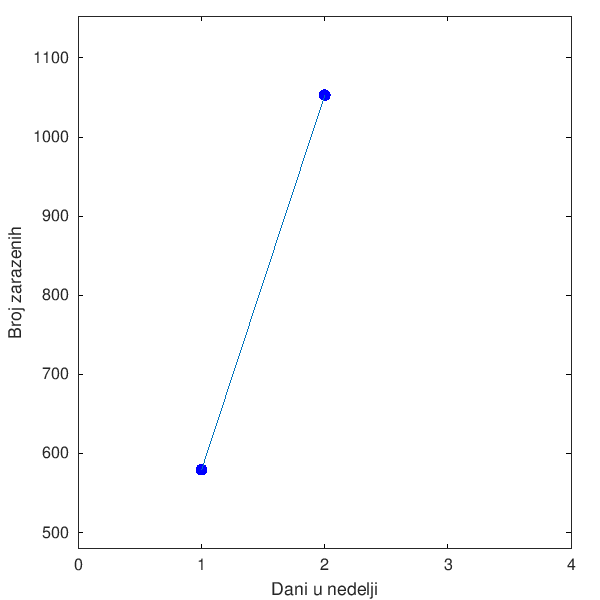

In [31]:
plot_points(x,y)
hold on;
xp=linspace(1,max(x),100);
plot(xp,polyval(p,xp))

#### Koristimo sada tri tačke i proširujemo kod da tako da formiramo:
### $$p(x)=y_1\frac{(x-x_2)(x-x_3)}{(x_1-x_2)(x_1-x_3)}+y_2\frac{(x-x_1)(x-x_3)}{(x_2-x_1)(x_2-x_3)}+y_3\frac{(x-x_1)(x-x_2)}{(x_3-x_1)(x_3-x_2)}$$

In [32]:
x=x1(1:3)
y=y1(1:3)

x =

   1   2   4

y =

    579   1053   1384



In [33]:
p1 = y(1)*conv([1 -x(2)]/(x(1)-x(2)),[1 -x(3)]/(x(1)-x(3)))

p1 =

    193  -1158   1544



In [34]:
polyout(p1,'x')

193*x^2 - 1158*x^1 + 1544


In [35]:
polyval(p1,x(1))
polyval(p1,x(2))
polyval(p1,x(3))

ans =  579
ans = 0
ans = 0


In [36]:
p2 = y(2)*conv([1 -x(1)]/(x(2)-x(1)),[1 -x(3)]/(x(2)-x(3)))

p2 =

   -526.50   2632.50  -2106.00



In [37]:
polyout(p2,'x')

-526.5*x^2 + 2632.5*x^1 - 2106


In [38]:
polyval(p2,x(1))
polyval(p2,x(2))
polyval(p2,x(3))

ans = 0
ans =  1053
ans = 0


In [39]:
p3 = y(3)*conv([1 -x(1)]/(x(3)-x(1)),[1 -x(2)]/(x(3)-x(2)))

p3 =

   230.67  -692.00   461.33



In [40]:
polyout(p3,'x')

230.67*x^2 - 692*x^1 + 461.33


In [41]:
polyval(p3,x(1))
polyval(p3,x(2))
polyval(p3,x(3))

ans =   -5.6843e-14
ans =   -5.6843e-14
ans =  1384.0


#### Hajde na kratko da polgedamo zašto na primer rezultat $p_3(x_1)$ nije jednak tačno nuli.

In [42]:
format long
tmp1=230.67-692
tmp2=461.33
tmp1+tmp2

tmp1 = -461.3300000000000
tmp2 =  461.3300000000000
ans =   -5.684341886080801e-14


#### Vidimo da -461.33+461.33 nije jednako 0. Šta mislite zašto je to?
#### Odgovor leži u binarnoj reprezentaciji broja 0.33.
#### Kao što ćete videti u nastavku, broj 0.33 ne može nikada tačno da se konvertuje u binaran broj, odnosno algoritam za konverziju se nikada ne zavaršava pa mora da se prekine kada se napuni kapacitet računara. Iz tog razloga 0.33 nije na računaru nikad 0.33 iako nam računar prikazuje tako.
#### Pogledajmo sledeći kod za konverziju:

In [43]:
a = 0.33; % realan broj
n = 16;         % broj bitova za celobrojni deo (pre decimalne tačke)     
m = 25;         % broj bitova za razlomački deo (posle decimalne tačke)   
% binaran broj
d2b = fix(rem(a*pow2(-(n-1):m),2)) 
%pow2(-(n-1):m) - stepeni 2 od -(n-1) do m,rem(a*pow2(-(n-1):m),2) ostatak pri deljenju a*pow2 sa 2, fix uzima prvu cifru pre decimalne tacke od ostatka.
%0.33 nikad ne daje ostatak 0 pri deljenju sa 2 zato uvek imamo periodu koliko god da povecavamo m

d2b =

 Columns 1 through 20:

   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   1

 Columns 21 through 40:

   0   1   0   0   0   1   1   1   1   0   1   0   1   1   1   0   0   0   0   1

 Column 41:

   0



In [44]:
m = 50;
d2b = fix(rem(a*pow2(-(n-1):m),2))

d2b =

 Columns 1 through 20:

   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   1

 Columns 21 through 40:

   0   1   0   0   0   1   1   1   1   0   1   0   1   1   1   0   0   0   0   1

 Columns 41 through 60:

   0   1   0   0   0   1   1   1   1   0   1   0   1   1   1   0   0   0   0   1

 Columns 61 through 66:

   0   1   0   0   0   1



#### Vidimo da imamo periodu 1   0   0   0   1   1   1   1   0   1   0   1   1   1   0   0   0   0   1 koja se ponavlja koliko god da proširimo broj cifara za reprezentaciju decimalnog dela. Algoritam se nikada ne završava, tj. 0.33 nije nikad tačno reprezentovan na računaru.
#### Proverićemo ovu tvrdnju na još jedan način.

In [45]:
tmp_p=0;
for i=1:10
    tmp_p=tmp_p+0.33
end
tmp_p
tmp_p==3.3

tmp_p =    3.300000000000000e-01
tmp_p =    6.600000000000000e-01
tmp_p =    9.900000000000000e-01
tmp_p =  1.320000000000000
tmp_p =  1.650000000000000
tmp_p =  1.980000000000000
tmp_p =  2.310000000000000
tmp_p =  2.640000000000000
tmp_p =  2.970000000000000
tmp_p =  3.300000000000000
tmp_p =  3.300000000000000
ans = 0


#### Vidimo da 3.3 nije isto što i kada 10 puta na računaru saberemo 0.3.
#### Postoji puno ovkavih slučajeva, npr. 0.1, i toga moramo da budemo svesni dok radimo na računaru.
#### Daćemo sada primer broja 0.1875 koji je moguće tačno konvertovati u binaran. Nemamo periodu već samo nule nakon što se konverzija završi. Sam algoritam konverzije obrađujemo na posebnom predavanju.

In [46]:
m = 25;
a = 0.1875;
d2b = fix(rem(a*pow2(-(n-1):m),2))

d2b =

 Columns 1 through 20:

   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   1

 Columns 21 through 40:

   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0

 Column 41:

   0



#### Dakle, naš polinom $p_3$ nije pogrešan već je posledica ograničenog kapaciteta računara za smeštanje brojeva. Iz tog razloga nastavljamo sa formiranjem Lagranžovog polinoma.

In [47]:
format short

In [48]:
p=p1+p2+p3
polyout(p,'x')

p =

  -102.83   782.50  -100.67

-102.83*x^2 + 782.5*x^1 - 100.67


#### Ponavljamo formulu po treći put da bi lakše ispratili kod:
### $$p(x)=y_1\frac{(x-x_2)(x-x_3)}{(x_1-x_2)(x_1-x_3)}+y_2\frac{(x-x_1)(x-x_3)}{(x_2-x_1)(x_2-x_3)}+y_3\frac{(x-x_1)(x-x_2)}{(x_3-x_1)(x_3-x_2)}$$

In [49]:
function p=linterp(x,y)
    n=length(x);
    p = 0;
    for i=1:n
        L=1;
        for j=1:n
            if i~=j
                L = conv(L,[1 -x(j)]/(x(i)-x(j)));
            end
        end
        p = p + y(i)*L;
    end
endfunction

#### Testiramo napisanu funkciju.

In [50]:
x
y
p=linterp(x,y)
polyout(p,'x')

x =

   1   2   4

y =

    579   1053   1384

p =

  -102.83   782.50  -100.67

-102.83*x^2 + 782.5*x^1 - 100.67


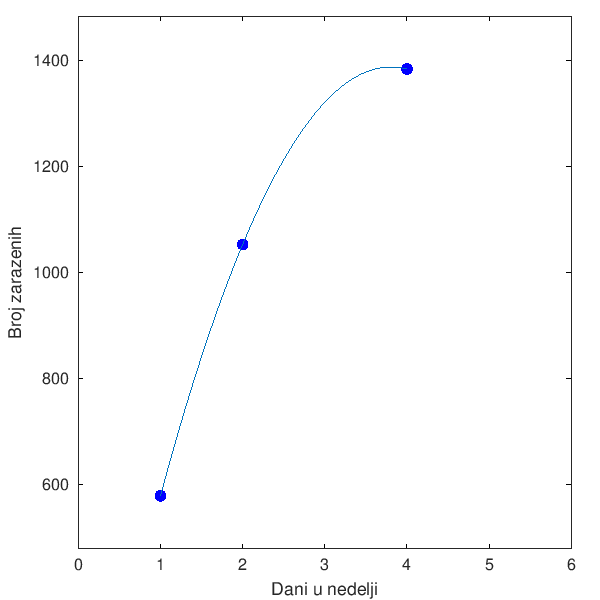

In [51]:
plot_points(x,y)
hold on;
xp=linspace(1,max(x),100);
plot(xp,polyval(p,xp))

#### Koristimo sada tačke (dane) 1, 2, 4 i 5 za interpolaciju, a nakon toga procenjujemo vrednost za dan 3.

In [52]:
x=1:5
y=[579,1053,1328,1384,1545]
unknown = 3;
x1=[1:length(x)];
x1(unknown)=[]
y1=y;
y1(unknown)=[]
p=linterp(x1,y1)
p_pomocu_SLAJ
polyval(p,3)

x =

   1   2   3   4   5

y =

    579   1053   1328   1384   1545

x1 =

   1   2   4   5

y1 =

    579   1053   1384   1545

p =

     25.333   -280.167   1137.167   -303.333

p_pomocu_SLAJ =

     25.333   -280.167   1137.167   -303.333

ans =  1270.7


#### Vidimo da je Lagranžova intepolacija proizvela isti polinom kao metod pomoću sistema linearnih jednačina. To je zato što je interpolacioni polinom jedinstven. Iako postoji formalan dokaz, dovoljno je da razmislimo o tome koliko pravih može da se povuče kroz dve date tačke.

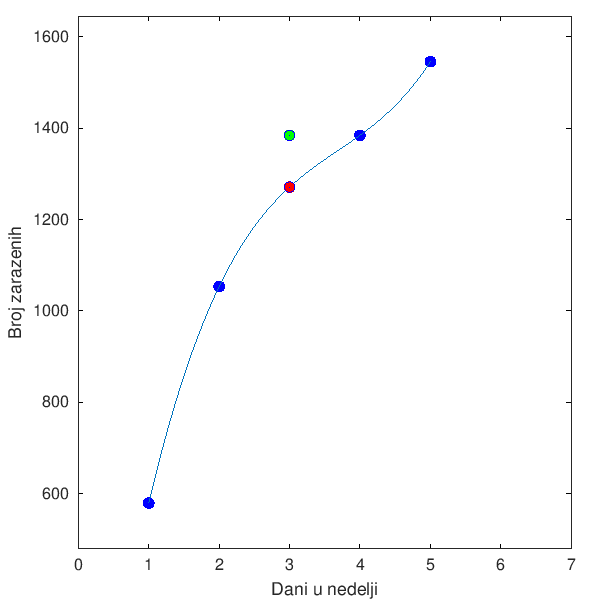

In [53]:
plot_points(x1,y1)
hold on;
xp=linspace(1,max(x),100);
plot(xp,polyval(p,xp))
hold on;
plot(unknown,polyval(p,unknown),'ob','markersize', 10,'markerfacecolor','r')
hold on;
plot(unknown,y1(unknown),'ob','markersize', 10,'markerfacecolor','g')

In [54]:
predikcija_p_pomocu_SLAJ = polyval(p_pomocu_SLAJ,unknown)

predikcija_p_pomocu_SLAJ =  1270.7


In [55]:
predikcija_p_linterp = polyval(p,unknown)

predikcija_p_linterp =  1270.7


In [56]:
tacna_vrednost = y1(unknown)

tacna_vrednost =  1384


## Interpolacija splajnom

#### Interpolacione metode koje smo do sada radili nisu pogodne za upotrebu kada je broj interpolacionih tačaka veći.
#### Kada je broj interpolacionih tačaka veći interpolacioni polinom postaje "nestabilan", tj. ima velike oscilacije (nagle skokove i padove) što se može prepoznati po velikim apsolutnim vrednostima koeficijenata.
#### Intuitivno, nestabilnost je posledica interpolacionih uslova, odnosno zahteva da jedan polinom prođe baš kroz sve tačke.

#### Nestabilost interpolacionog polinoma ilustrovaćemo na primeru od 10 dana i broja zaraženih u Srbiji.

x =

    1    2    3    4    5    6    7    8    9   10

y =

    122    326    512    416    579    757    614    341   1053   1328



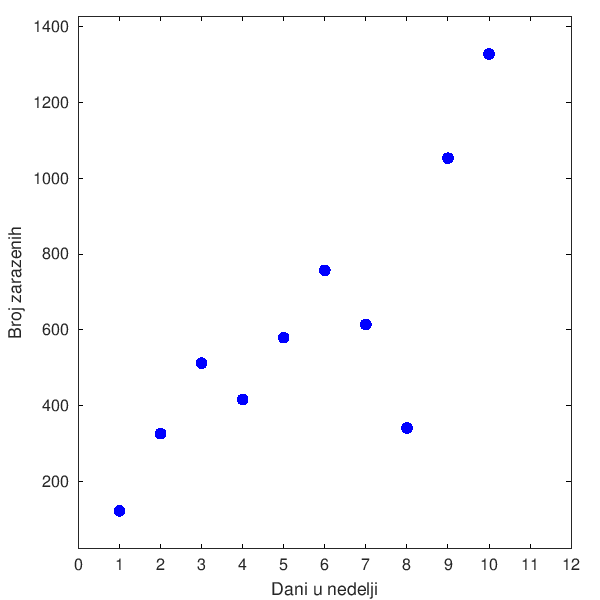

In [57]:
x=1:10
y=[122,  326,  512,  416,  579,  757,  614,  341, 1053, 1328]
plot_points(x,y)

In [58]:
p=linterp(x,y)

p =

 Columns 1 through 5:

      -0.015699       0.761260     -16.098462     194.538194   -1472.284549

 Columns 6 through 10:

    7161.947569  -22049.425099   40583.252976  -39385.676190   15105.000000



#### Vidimo da $p$ ima dosta velike vrednosti koeficijenata.

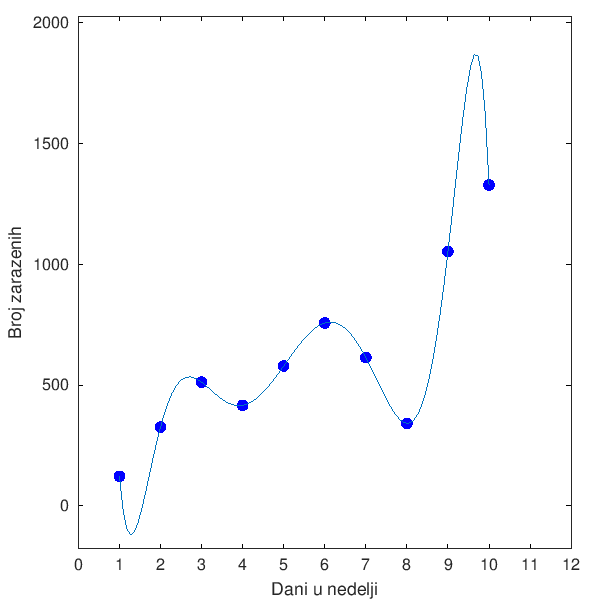

In [59]:
plot_points(x,y)
hold on;
xp=linspace(1,length(x),100);
plot(xp,polyval(p,xp))
axis([0,max(x)+2,min(y)-300 max(y)+700]);

#### Sa grafika se vidi da $p$ ima nagle uspone i padove.

In [60]:
polyval(p,1.5)

ans = -41.045


#### Ako recimo izračunamo vrednost $p$ u tački 1.5 dobijamo da je broj zaraženih negativan???

In [61]:
polyval(p,9.7)

ans =  1872.3


In [62]:
polyval(p,10)

ans =  1328.0


#### U ovom slučaju promena x za 0.3 rezultuje skokom od preko 500 zaraženih što je previše nagli skok.
#### Cilj nam je da $p$ što realnije oslikava podatke koje imamo.

## Algoritam interpolacije splajnom

#### Interpolacija splajnom je deo-po-deo interpolacija i funkcioniše tako što se između svake dve date tačke formira poseban interpolacioni polinom.
#### Rezultat interpolacije splajnom nije jedan polinom nego skup polinoma.

### Linearni splajn

#### Kod ovog splajna između svake dve tačke formiramo pravu.
#### Za datih $n$ tačaka rezultat je $n-1$ prava, zato što toliko imamo pod-intervala.
#### Nacrtaćemo sada linearni splajn za naš primer sa 10 tačka.

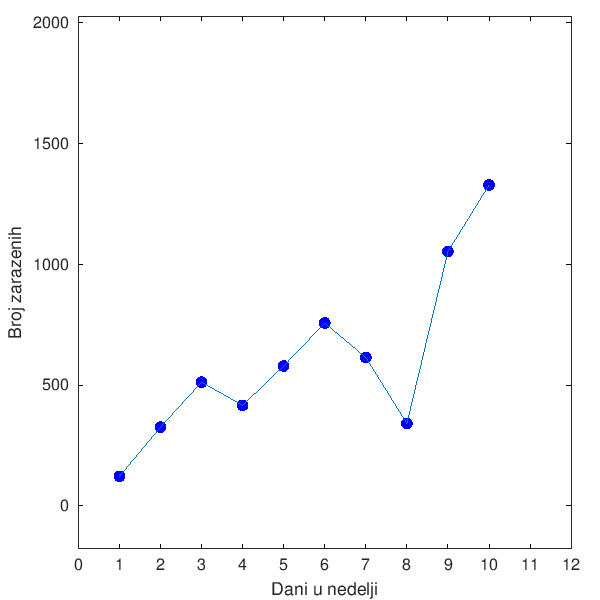

In [63]:
x=1:10;
y=[122,  326,  512,  416,  579,  757,  614,  341, 1053, 1328];
plot_points(x,y)
hold on;
p=splinefit (x, y, 9, "order", 1);
xp=linspace(1,max(x),100);
plot(xp,ppval(p, xp))
axis([0,max(x)+2,min(y)-300 max(y)+700]);

#### Splajnove koristimo tako što za odgovarajuću tačku koju hoćemo da ubacimo u splajn pronađemo tačke između kojih se nalazi i onda ubacimo tačku u pravu između njih. U Octave za nas to automatski obavlja funkcija ppval.

#### Očigledno je da, iako je veoma jednostavn, linerani splajn je veoma gruba interpolacija jer je retko slučaj da je prelaz iz jedne u drugu tačku baš linearan.
#### Pored toga linearni splajn ima nagle promene nagiba (izvoda) u datim tačkama što znači da se njegov oblik naglo menja na prelazima iz jedne tačke u drugu. Ako u našim podacima postoji trend, vrlo je verovtano da ne sadrži tako nagle prelaze, pa bi bilo dobro da pronađemo bolji način za interpolaciju.

### Kvadratini splajn

#### Kao što samo ime kaže u ovom slučaju između svake dve tačke formiramo polinom drugog stepena.
#### Za razliku od linearnog splajna, prelazi između tačka neće biti nalgli jer kao uslov za formiranje kvadratni splajn zahteva da izvodi u unutrašnjim tačkama (gde se dva splajna spajaju) budu jednaki. Dakle, nagib kojim se jedan splajn završava isti je kao i nagib kojim sledeći splajn počinje. Sada imamo glatke prelaze, a ne špiceve.
#### Crtamo kvadratni splajn za naš primer sa 10 tačaka.

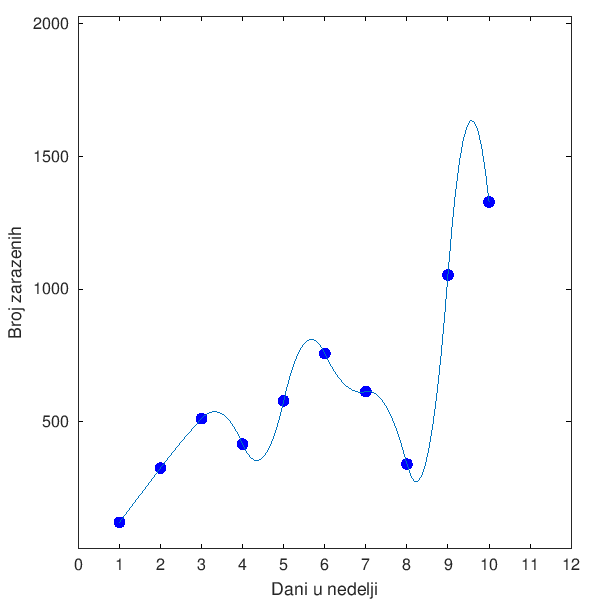

In [67]:
x=1:10;
y=[122,  326,  512,  416,  579,  757,  614,  341, 1053, 1328];
plot_points(x,y)
hold on;
my_kv_splajn = qudratic_spline(x,y);
xp=linspace(1,max(x),100);
plot(xp,eval_spline(my_kv_splajn,x,xp))
axis([0,max(x)+2,min(y)-100 max(y)+700]);

#### Kao što vidimo kod kvadratnog splajna prelazi u intepolacionim tačkama su blaži. Nemamo špiceve, tj. prekide prvog izvoda kao kod linearnog splajna.
#### Uporedićemo sada kvadratni splajn i Lagranžov interpolacioni polinom.

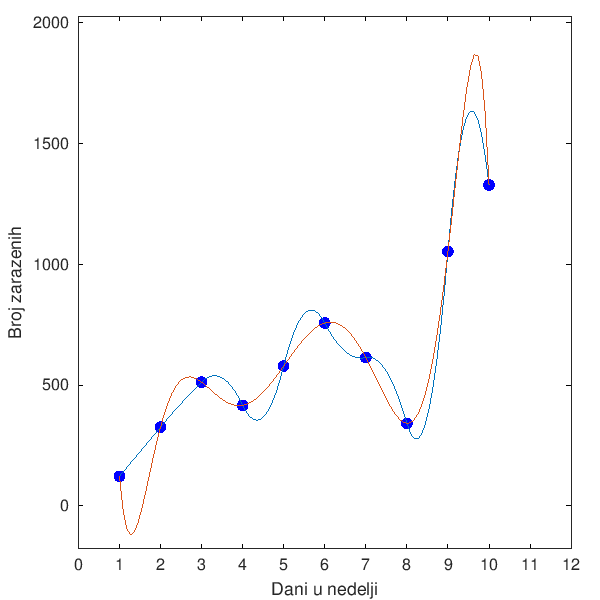

In [68]:
plot_points(x,y)
hold on;
my_kv_splajn = qudratic_spline(x,y);
xp=linspace(1,max(x),100);
plot(xp,eval_spline(my_kv_splajn,x,xp))
axis([0,max(x)+2,min(y)-300 max(y)+700]);
hold on;
linterp_pol=linterp(x,y);
plot(xp,polyval(linterp_pol,xp))

In [69]:
polyval(linterp_pol,1.5)
eval_spline(my_kv_splajn,x,[1.5])

ans = -41.045
ans =  224


In [70]:
[y(9) y(10)]
polyval(linterp_pol,9.5)
eval_spline(my_kv_splajn,x,[9.5])

ans =

   1053   1328

ans =  1773.3
ans =  1625.3


#### Očigledno je da kvadratni splajn nema oscilacije koje ima Lagražnov interpolacioni polinom. Nema negativnih vrednosti u tački 1.5. Takođe prelaz između tačka 9 i 10 je mnogo blaži, tj. realniji.
#### Pokazaćemo sada kako izgleda svaki od polinoma kvadratnog splajna.

In [72]:
for i=1:3:length(my_kv_splajn)
    polyout(my_kv_splajn(i:i+2,1),'x')
end

0*x^2 + 204*x^1 - 82
-18*x^2 + 276*x^1 - 154
-264*x^2 + 1752*x^1 - 2368
523*x^2 - 4544*x^1 + 10224
-508*x^2 + 5766*x^1 - 15551
187*x^2 - 2574*x^1 + 9469
-317*x^2 + 4482*x^1 - 15227
1302*x^2 - 21422*x^1 + 88389
-1739*x^2 + 33316*x^1 - 1.5793e+05


### Formiranje kvadratnog splajna

#### Formiranje kvadratnog splajna objasnićemo pomoću našeg primera sa 5 dana gde određujemo vrednost za dan 3.

x1 =

   1   2   4   5

y1 =

    579   1053   1384   1545



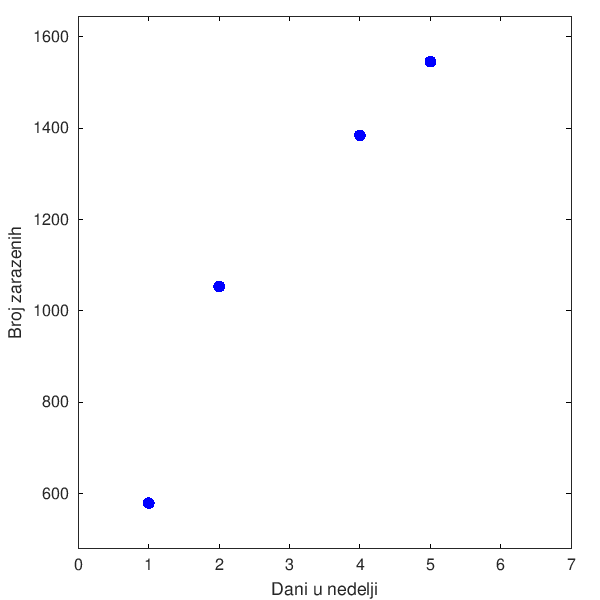

In [73]:
x=1:5;
y=[579,1053,1328,1384,1545];
unknown = 3;
x1=[1:length(x)];
x1(unknown)=[]
y1=y;
y1(unknown)=[]
plot_points(x1,y1)

#### Koeficijente kvadratnog splajna određujemo rešavanjem sistema linearnih jedančina, ali taj sistem formiramo na drugačiji način u odnosu na sistem koji smo rešavali na početku predavanja.
#### Sistem linearnih jedančina formiramo pomoću uslova koje kvadratni splajn mora da zadovoljava:
#### 1.Splajnovi moraju da prolaze kroz date tačke. Prvi splajn mora da prolazi kroz prvu i drugu, drugi kroz drugu i treću, treći kroz četvrtu i petu.
#### 2. Prvi izvod splajnova u unturašnjim tačkama moraju da budu jednaki. Prvi izvod prvog i drugog splajna moraju da budu jedanki u drugoj tački, prvi izvod drugog i trećeg splajna moraju da budu jednaki u trećoj tački.
#### Formiramo sada redom jedančine za naš primer pomoću uslova 1. i 2.
#### Pre toga samo napomena da je naš zadatak da odredimo koeficijente u ovom slučaju 3 kvadratna polinoma, a opšti oblik kvadratnog polinoma koji koristimo je:
#### $$p(x)=ax^2+bx+c$$

#### 1. Splajnovi moraju da prolaze kroz date tačke (1,579), (2,1053), (4,1384), (5,1545):
#### $$a_1\cdot 1^2+b_1\cdot 1+c_1=579\\a_1\cdot 2^2+b_1\cdot 2+c_1=1053\\a_2\cdot 2^2+b_2\cdot 2+c_2=1053\\a_2\cdot 4^2+b_2\cdot 4+c_2=1384\\a_3\cdot 4^2+b_3\cdot 4+c_3=1384\\a_3\cdot 5^2+b_3\cdot 5+c_3=1545$$

#### 2. Prvi izvod splajnova u unturašnjim tačkama (2,1053), (4,1384) moraju da budu jednaki:
#### $$2\cdot 2\cdot a_1+b_1=2\cdot 2\cdot a_2+b_2\\2\cdot 4\cdot a_2+b_2=2\cdot 4\cdot a_3+b_3$$

#### Vidimo da imamo 8 jednačina, a 9 nepoznatih koeficjenata. 
#### Ovo je normlano kod formiranja kvadratnog splajna, i nije vezano za naš primer. Ako imamo $n$ tačaka, odnosno $n-1$ splajnova, gde svaki splajn ima 3 nepoznate, uvek ćemo pomoću uslova dobiti:
#### $$1 + 2(n-2) + 1 + n-2 = 2 + 2n-4 + n - 2 = 3n-4$$
#### jednačina. 
#### Koliko nepoznatih imamo? Pošto imamo $n-1$ splajnova, a svaki ima 3 nepoznata koeficijenta imamo:
#### $$3(n-1)=3n-3$$
#### nepoznatih. Znači nedostaje nam jedna jednačina.
#### Postoji više dodatnih uslova pomoću kojih se rešava problem nedostajuće jednačine i ti uslovi se obično zovu granični uslovi.
#### Jedan od graničnih uslova koji se često koristi kod kvadratnog splajna je tzv. *prirodni splajn* kod koga je koeficijent uz $x^2$ kod prvog splajna jednak nuli. Tada je prvi splajn prava, a ne kvadratni polinom, pošto je $a_1=0$.

#### Koristimo uslov za prirodni splajn, formiramo i rešavamo sistem jedančina.
#### $$\begin{bmatrix}1 & 1 & 0 & 0 & 0 & 0 & 0 & 0\\2 & 1 & 0 & 0 & 0 & 0 & 0 & 0 \\0 & 0 & 2^2 & 2 & 1 & 0 & 0 & 0\\0 & 0 & 4^2 & 4 & 1 & 0 & 0 & 0\\0 & 0 & 0 & 0 & 0 & 4^2 & 4 & 1\\0 & 0 & 0 & 0 & 0 & 5^2 & 5 & 1\\1 & 0 & -4 & -1 & 0 & 0 & 0 & 0\\0 & 0 & 8 & 1 & 0 & -8 & -1 & 0\end{bmatrix}\begin{bmatrix}b_1\\c_1\\a_2\\b_2\\c_2\\a_3\\b_3\\c_3\end{bmatrix}=\begin{bmatrix}579\\1053\\1053\\1384\\1384\\1545\\0\\0\end{bmatrix}$$

In [74]:
function p=qudratic_spline(x,y)
    n=length(x);
    dim_A=3*n-4;
    A=zeros(dim_A,dim_A);
    b=zeros(dim_A,1);
     
    A(1,1)=x(1);
    A(1,2)=1;
    
    A(2,1)=x(2);
    A(2,2)=1;
    
    b(1)=y(1);
    b(2)=y(2);
    
    row_pos=3;
    col_pos=3;
    for i=2:n-1
        for j=0:2
            A(row_pos,col_pos+j)=x(i)^(2-j);
            A(row_pos+1,col_pos+j)=x(i+1)^(2-j);
            
            b(row_pos)=y(i);
            b(row_pos+1)=y(i+1);
        end
        row_pos=row_pos+2;
        col_pos=col_pos+3;
    end
    
    A(row_pos,1)=1;
    A(row_pos,3)=-2*x(2);
    A(row_pos,4)=-1;
    
    row_pos=row_pos+1;
    col_pos=3;
    for i=3:n-1
        A(row_pos,col_pos)=2*x(i);
        A(row_pos,col_pos+1)=1;
        col_pos=col_pos+3;
        A(row_pos,col_pos)=-2*x(i);
        A(row_pos,col_pos+1)=-1;
        row_pos=row_pos+1;
    end
    A;
    b;
    p=[0;A\b];
endfunction

In [75]:
my_kv_splajn = qudratic_spline(x1,y1)

my_kv_splajn =

      0.00000
    474.00000
    105.00000
   -154.25000
   1091.00000
   -512.00000
    304.00000
  -2575.00000
   6820.00000



In [76]:
for i=1:3:length(my_kv_splajn)
    polyout(my_kv_splajn(i:i+2,1),'x')
end

0*x^2 + 474*x^1 + 105
-154.25*x^2 + 1091*x^1 - 512
304*x^2 - 2575*x^1 + 6820


In [77]:
function results=eval_spline(spline,x,points)
    n=length(points);
    results=zeros(n,1);
    for i=1:n
        if points(i)<x(1)
            p=spline(1:3,1);
            results(i)=polyval(p,points(i));
        end
        if points(i)>x(length(x))
            p=spline(length(spline)-2:length(spline),1);
            results(i)=polyval(p,points(i));
        end
        for j=1:length(x)-1
            if x(j)<=points(i) && points(i)<=x(j+1)
                p=spline(3*(j-1)+1:3*(j-1)+3,1);
                results(i)=polyval(p,points(i));
                break
            end
        end
    end
endfunction

In [78]:
predikcija = eval_spline(my_kv_splajn,x1,[unknown])
tacna_vrednost = y1(unknown)

predikcija =  1372.8
tacna_vrednost =  1384


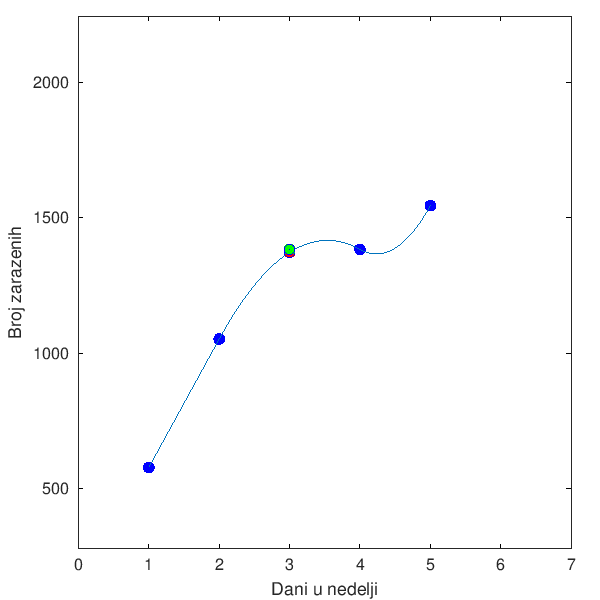

In [81]:
plot_points(x1,y1)
hold on;
my_kv_splajn = qudratic_spline(x1,y1);
xp=linspace(1,max(x1),100);
plot(xp,eval_spline(my_kv_splajn,x1,xp))
axis([0,max(x1)+2,min(y1)-300 max(y1)+700]);
hold on;
plot(unknown,eval_spline(my_kv_splajn,x1,[unknown]),'ob','markersize', 10,'markerfacecolor','r')
hold on;
x=1:5;
y=[579,1053,1328,1384,1545];
plot(unknown,y1(unknown),'ob','markersize', 10,'markerfacecolor','g')

## Kubni slpajan

#### Kod kubnog splajna između svake dve tačke formira se kubni polinom:
#### $$ax^3+bx^2+cx+d$$
#### Pošto kubni polinom ima 4 koeficijenta, u slučaju da imamo n tačaka, tj. $n-1$ splajn ukupno imamo $4n-4$ nepoznata koeficijenta. Što znači da nam treba $4n-4$ jednačine.
#### Kao što smo videli ranije, uslovi za kvadratni splajn nam daju $3n-4$ jednačine tako da nam nedostaje $n$ uslova.
#### Iz tog razloga kod kubnog splajna dodaje je se i uslov poklapanja drugih izvoda u unutrašnjim tačkama. Grubo gledano to znači da neće biti naglih promena zakrivljenosti u unutrašnjim tačkama.
#### Do promena zakrljivenosti dolazi u slučaju da drugi izvod funkcije menja znak u nekoj tački. Na grafiku ispod data je funkcija 
#### $$f(x)=5x^3+2x^2-3x$$
#### Njen drugi izvod je $f(x)=30x+4$. Drugi izvod menja znak u tački $x=-2/15$. To znači da je funkcija do tačke $x=-\frac{2}{15}$ konkavna, a od tačke $x=-\frac{2}{15}$ konvenska, tj. njena zakrivljenost se promenila.
#### Time što zhavevamo da su drugi izvod splajnova u unutrašnjim tačkama jednaki, obezbedili smo da neće biti promene zakrivljenosti splajna u unutrašnjim tačkama.
#### Grafik funkcije $f(x)=5x^3+2x^2-3x$:

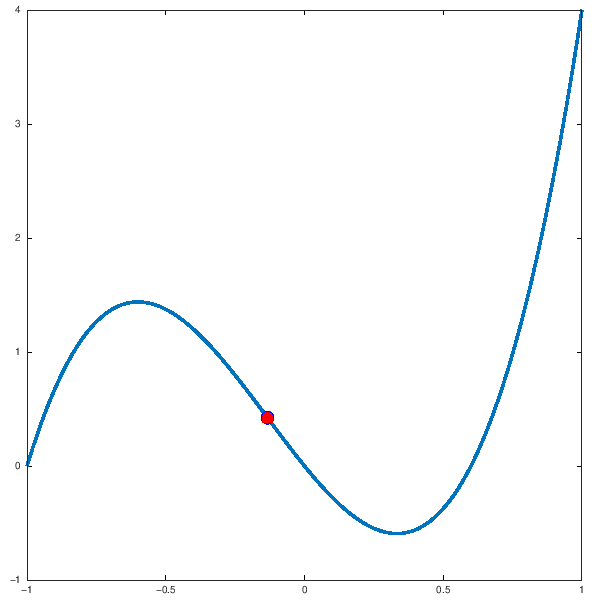

In [100]:
xp=linspace(-1,1,100);
plot(xp,5.*xp.^3+2.*xp.^2-3.*xp, "linewidth", 10);
hold on;
xp=-2/15;
plot(xp,5.*xp.^3+2.*xp.^2-3.*xp, 'ob','markersize', 12,'markerfacecolor','r');

#### Grafik drugog izovda funkcije $f(x)=5x^3+2x^2-3x$:

ans = -0.13333


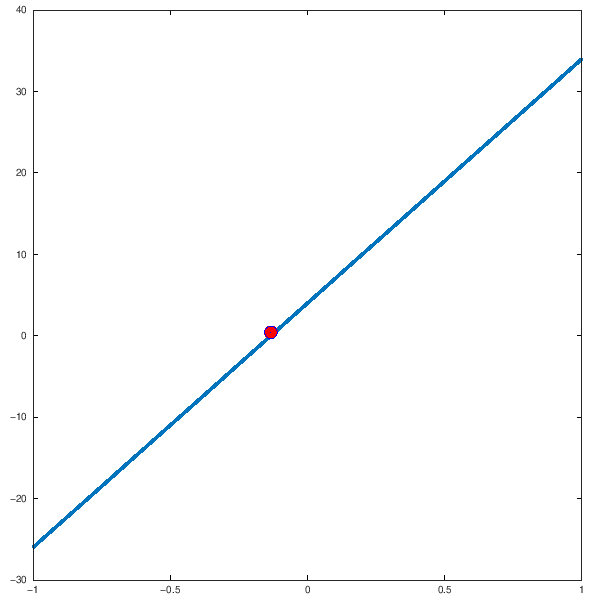

In [104]:
xp=linspace(-1,1,100);
plot(xp,30.*xp+4,"linewidth", 10);
hold on;
roots([30 4])
xp=-0.13333;
plot(xp,5.*xp.^3+2.*xp.^2-3.*xp, 'ob','markersize', 12,'markerfacecolor','r');

#### Pošto unutrašnjih tačaka ima $n-2$, a zahtevamo poklapanje drugog izvoda u njima to znači da smo dobili još $n-2$ uslova.
#### Dakle, nedostaje nam još 2 uslova odnosno još dve jednačine. Ta dva uslova biraju se na različite načine, a u nastavku su navedena dva najčešće korišćena.
#### 1. Prirodni splajn (natural spline) – pretpostavimo da su drugi izvodi u kranjim tačkama jednaki nuli. 
#### Ovaj uslov znаči da će u okolini pre prve i nakon poslednje tačke funkcija biti linearna jer u tački u kojoj je drugi izvod nula funkcija menja zakrivljenost pa je tokom te promene u jednom malom delu linearna (pogledati grafik funkcije iznad). Cilj ovog uslova je da splajn oko krajeva nema oscilacija, tj. da eventualne ekstrapolacije bilzu krajnjih tačaka ne budu "nepredvidive". Naziv "pirordan" potiče od tumačenja splajna kao elastičnnog štapa koji smo počeli da savijamo u krajnjim tačkama.
#### 2. “Not-a-knot” splajn – pretpostaviti jednakost trećeg izvoda u drugoj i preposlednjoj tački. Ovaj splajn zove se “Not-a-knot” jer faktički druga i pretposlednja tačka nisu više čvorovi, u smislu da je splajn pre i posle njih isti. Recimo da imamo neku tačku $x_i$, pogledaćemo kako izgleda jednakost dva kubna polinoma u toj tački redom do trećeg izvoda:
#### $$a_1x_i^3+b_1x_i^2+c_1x_i+d_1=a_2x_i^3+b_2x_i^2+c_2x_i+d_2$$
#### $$3a_1x_i^2+2b_1x_i+c_1=3a_2x_i^2+2b_2x_i+c_2$$
#### $$6a_1x_i^2+2b_1=6a_2x_i^2+2b_2$$
#### $$6a_1=6a_2$$
#### Ako krenemo od jednakosti trećeg izvoda iz čega sledi $6a_1=6a_2$ i zamenjujemo redom do gore, vidimo da su dva kubna polinoma jednaka, što u našem slučaju znači da se splajn ne menja u drugoj i preposlednjoj tački.

#### Kubni splajn je najčešće korišćena splajn metoda jer pruža najbolji odnos između kompleksnosti metode i kvaliteta interpolacije. Većina alata koji nude interpolaciju splajnom, nude kubni splajn.

#### Prikazaćemo sada upotrebnu kubnog splajna za naša dva primera (sa 4 i 10 tačaka). Koristimo Octave ugrađenu funkciju *splinefit* (u dokumentaciji nije precizirano koji dodatni uslovi se koriste). Napomena: u MATLABU se koristi funkcija *spline* i podarzumevani tip je “Not-a-knot” splajn.

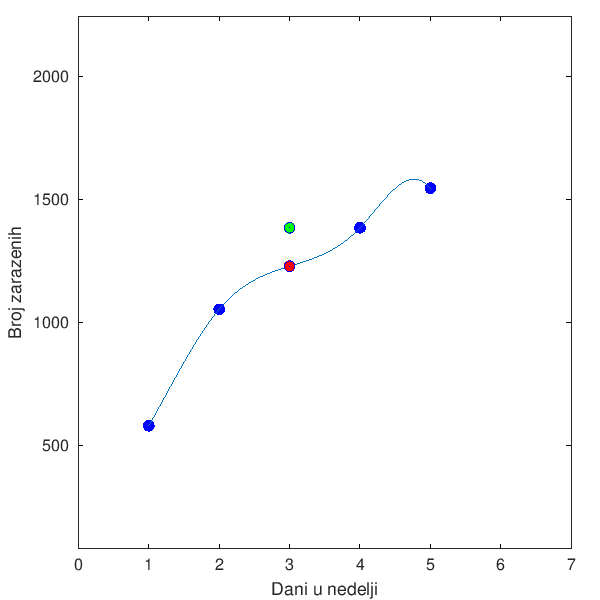

In [82]:
plot_points(x1,y1)
hold on;
kv_splajn=splinefit(x1, y1, 3, "order", 3);
xp=linspace(1,max(x1),100);
plot(xp,ppval(kv_splajn, xp))
axis([0,max(x1)+2,min(y1)-500 max(y1)+700]);
hold on;
plot(unknown,ppval(kv_splajn,unknown),'ob','markersize', 10,'markerfacecolor','r')
hold on;
plot(unknown,y1(unknown),'ob','markersize', 10,'markerfacecolor','g')

In [83]:
predikcija = ppval(kv_splajn,unknown)
tacna_vrednost = y1(unknown)

predikcija =  1227.9
tacna_vrednost =  1384


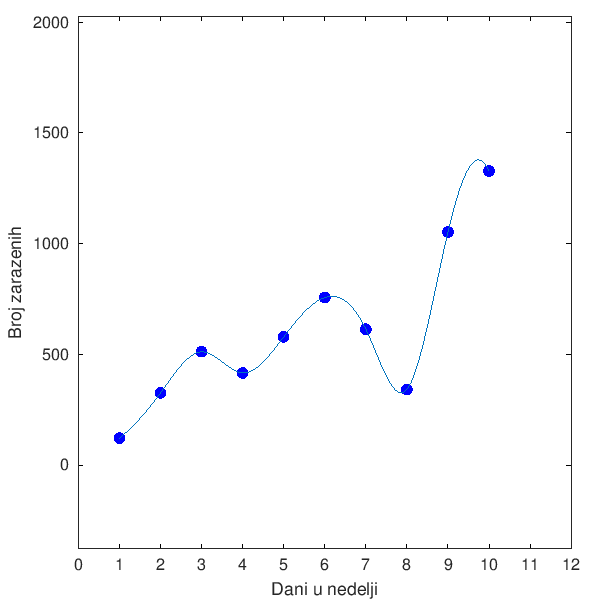

In [109]:
x=1:10;
y=[122,  326,  512,  416,  579,  757,  614,  341, 1053, 1328];
plot_points(x,y)
hold on;
cubic_splajn=splinefit(x, y, 9, "order", 3);
xp=linspace(1,max(x),100);
plot(xp,ppval(cubic_splajn, xp))
axis([0,max(x)+2,min(y)-500 max(y)+700]);

#### Poredimo kubni i kvadratni splajn.

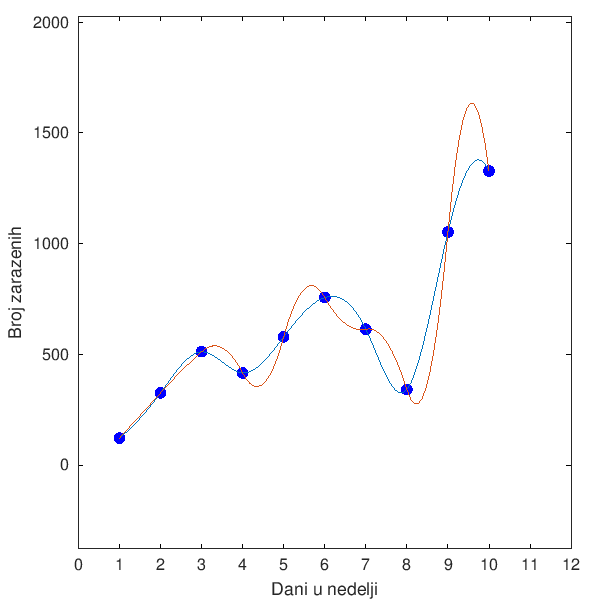

In [88]:
x=1:10;
y=[122,  326,  512,  416,  579,  757,  614,  341, 1053, 1328];
plot_points(x,y)
hold on;
cubic_splajn=splinefit(x, y, 9, "order", 3);
xp=linspace(1,max(x),100);
plot(xp,ppval(cubic_splajn, xp))
axis([0,max(x)+2,min(y)-500 max(y)+700]);
my_kv_splajn = qudratic_spline(x,y);
xp=linspace(1,max(x),100);
plot(xp,eval_spline(my_kv_splajn,x,xp))
hold on;

#### Poredimo kubni i kvadratni splajn i lagražnov interpolacioni polinom.

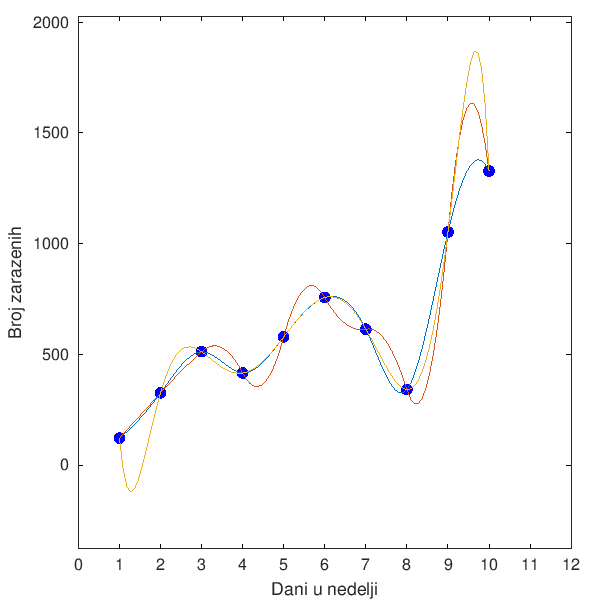

In [90]:
x=1:10;
y=[122,  326,  512,  416,  579,  757,  614,  341, 1053, 1328];
plot_points(x,y)
hold on;
cubic_splajn=splinefit(x, y, 9, "order", 3);
xp=linspace(1,max(x),100);
plot(xp,ppval(cubic_splajn, xp))
axis([0,max(x)+2,min(y)-500 max(y)+700]);
my_kv_splajn = qudratic_spline(x,y);
xp=linspace(1,max(x),100);
plot(xp,eval_spline(my_kv_splajn,x,xp))
hold on;
linterp_pol=linterp(x,y);
plot(xp,polyval(linterp_pol,xp))

In [86]:
[y(9) y(10)]
polyval(linterp_pol,9.5)
eval_spline(my_kv_splajn,x,[9.5])
ppval(cubic_splajn,9.5)

ans =

   1053   1328

ans =  1773.3
ans =  1625.3
ans =  1339.8


## Ekstrapolacija

#### Ekstrapolacija je upotreba interpolacionih polinoma za izračunavanje vrednosti van opsega x-koordinata tačka koje su date.
#### U našem primeru ekstrapolacija bilo bi izračunavanje broja zaraženih za svaki dan posle dana 10, ili teoretski moguće za svaki dan pre dana 1.
#### Ekstrapolacija može da rezultuje nepredvidim vrednostima, naročito ako se koristi jedan interpolacioni polinom koji, kao što ste videli, može da ima velike oscilacije ako imamo puno datih tačaka.

In [87]:
y(10)
polyval(linterp_pol,11)
eval_spline(my_kv_splajn,x,[11])
ppval(cubic_splajn,11)

ans =  1328
ans = -22933.00000
ans = -1875.0
ans = -112.91
